# Introdução

No atual clima político nos Estados Unidos, entender o perfil e as preferências dos eleitores é imprescindível para o desenvolvimento de estratégias eleitorais eficazes. Neste contexto, o conjunto de dados “Nonvoters” fornecido por FivethirtyEight serve como uma valiosa fonte de dados para a compreensão dos votantes nos Estados Unidos e dos fatores que influenciam as suas decisões políticas.

Ao analisar este conjunto de dados, procuramos responder a diversas questões que nos ajudarão a compreender melhor o nosso público de investigação, as percepções sobre o que significa “ser americano”, as escolhas partidárias e possíveis estratégias eleitorais. A análise inclui avaliar o perfil demográfico da amostra, identificar possíveis correlações entre níveis de educação e poder aquisitivo, investigar as preferências dos não-brancos sobre o que significa ser um “bom americano” e analisar as tendências de voto entre diferentes grupos demográficos.

Ao final da análise, esperamos fornecer insights valiosos para profissionais de marketing político, estrategistas eleitorais e pesquisadores interessados em compreender o comportamento do eleitorado americano e suas motivações políticas.


In [1]:
#Bibliotecas para tratar os dados
import pandas as pd
import numpy as np

#Bibliotecas para EDA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Configurar para não exibir warnings
import warnings
warnings.filterwarnings('ignore')

#Configurar quebras e espaçamentos automaticas com nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('nonvoters_data.csv')
df.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


<IPython.core.display.Javascript object>

## Análise Exploratória dos Dados:
Começamos nossa analise separando em nosso dataframe apenas as colunas que iremos utilizar nesta analise, desta forma focaremos na análise das variáveis relevantes e reduziremos a complexidade do conjunto de dados, tornando o processo mais eficiente.


In [3]:
cols = ['Q2_1','Q2_4','Q2_7','Q2_8','Q30','ppage','educ', 'race', 'gender', 'income_cat', 'voter_category']
voters = df[cols]
voters.head()

,Q2_1,Q2_4,Q2_7,Q2_8,Q30,ppage,educ,race,gender,income_cat,voter_category
0,1,4,2,2,2,73,College,White,Female,$75-125k,always
1,1,3,2,1,3,90,College,White,Female,$125k or more,always
2,1,2,2,1,2,53,College,White,Male,$125k or more,sporadic
3,1,3,1,1,2,58,Some college,Black,Female,$40-75k,sporadic
4,1,1,1,1,1,81,High school or less,White,Male,$40-75k,always


<IPython.core.display.Javascript object>

Q2_1 - Voting in elections

Q2_4 - Displaying the American flag

Q2_7 - Supporting the military

Q2_8 - Respect the opinions of those who disagree with you

Q30 - Party affiliation

In [4]:
print(f'Inicialmente, o dataset possui {voters.shape[0]} linhas e {voters.shape[1]} colunas.')

Inicialmente, o dataset possui 5836 linhas e 11 colunas.


<IPython.core.display.Javascript object>

In [5]:
colunas = ['Q2_1','Q2_4','Q2_7','Q2_8','Q30']
for coluna in colunas:
    voters = voters[voters[coluna] != -1]

<IPython.core.display.Javascript object>

In [6]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5702 entries, 0 to 5835
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q2_1            5702 non-null   int64 
 1   Q2_4            5702 non-null   int64 
 2   Q2_7            5702 non-null   int64 
 3   Q2_8            5702 non-null   int64 
 4   Q30             5702 non-null   int64 
 5   ppage           5702 non-null   int64 
 6   educ            5702 non-null   object
 7   race            5702 non-null   object
 8   gender          5702 non-null   object
 9   income_cat      5702 non-null   object
 10  voter_category  5702 non-null   object
dtypes: int64(6), object(5)
memory usage: 534.6+ KB


<IPython.core.display.Javascript object>

In [7]:
voters.nunique().sort_values()

gender             2
educ               3
voter_category     3
Q2_1               4
Q2_4               4
Q2_7               4
Q2_8               4
race               4
income_cat         4
Q30                5
ppage             72
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
voters.describe().T

,count,mean,std,min,25%,50%,75%,max
Q2_1,5702.0,1.256401,0.632281,1.0,1.0,1.0,1.0,4.0
Q2_4,5702.0,2.198702,1.066124,1.0,1.0,2.0,3.0,4.0
Q2_7,5702.0,1.511750,0.780700,1.0,1.0,1.0,2.0,4.0
Q2_8,5702.0,1.473869,0.655232,1.0,1.0,1.0,2.0,4.0
Q30,5702.0,2.354612,1.229710,1.0,1.0,2.0,3.0,5.0
ppage,5702.0,51.592950,17.044615,22.0,36.0,54.0,65.0,94.0


<IPython.core.display.Javascript object>

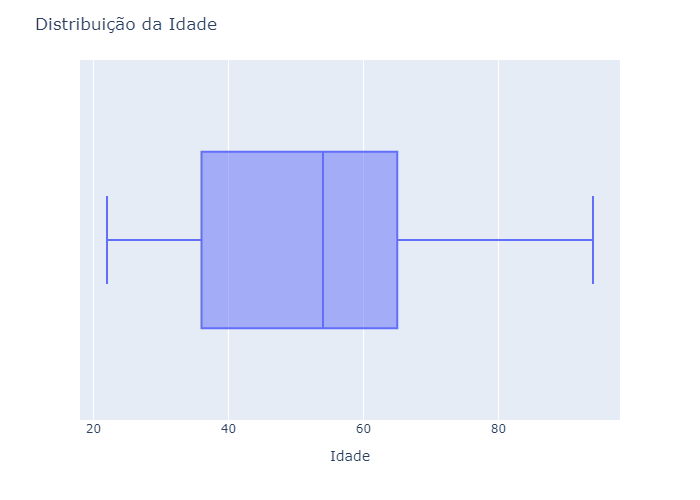

<IPython.core.display.Javascript object>

In [9]:
fig_age= px.box(voters, x='ppage')
fig_age.update_layout(title='Distribuição da Idade', xaxis_title='Idade')
fig_age.show('png')

Os valores indicam que a distribuição das idades é assimétrica positiva, com a maioria das idades concentradas entre 36 e 65 anos. A média de 54 anos sugere que a distribuição é puxada para a direita, devido à presença de valores mais altos. Os quartis fornecem uma ideia da dispersão dos dados, com 25% das idades abaixo de 36 anos (primeiro quartil) e 25% acima de 65 anos (terceiro quartil). O valor mínimo de 22 anos e o máximo de 94 anos indicam a extensão completa da distribuição.

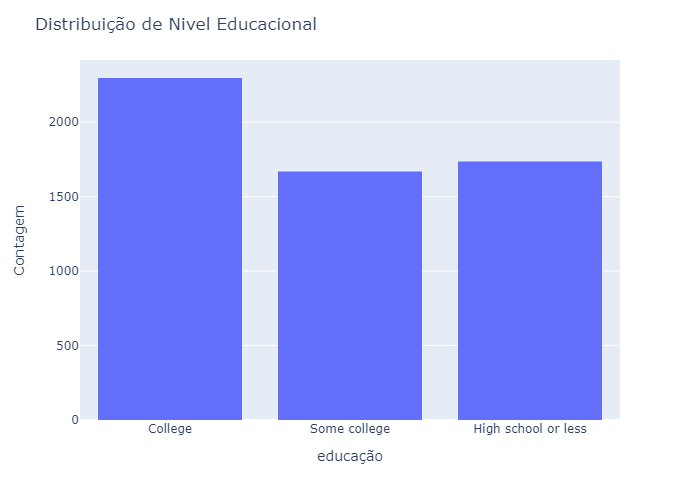

<IPython.core.display.Javascript object>

In [10]:
fig_educ= px.histogram(voters, x='educ')
fig_educ.update_layout(title='Distribuição de Nivel Educacional', xaxis_title='educação', yaxis_title='Contagem')
fig_educ.show('png')

Observamos a distribuição do nível educacional por meio de um gráfico de contagem e constatamos que a maioria das pessoas na nossa amostra possui formação universitária(College).

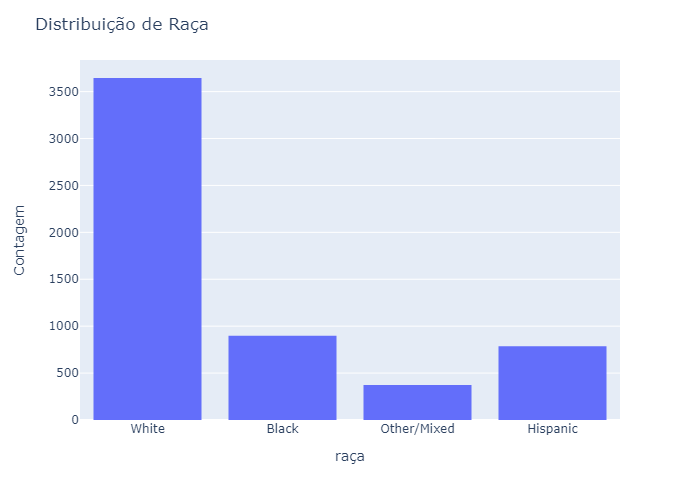

<IPython.core.display.Javascript object>

In [11]:
fig_race= px.histogram(voters, x='race')
fig_race.update_layout(title='Distribuição de Raça', xaxis_title='raça', yaxis_title='Contagem')
fig_race.show('png')

No que se refere à distribuição por raça, observamos que a maioria expressa sua identidade como branca(White).

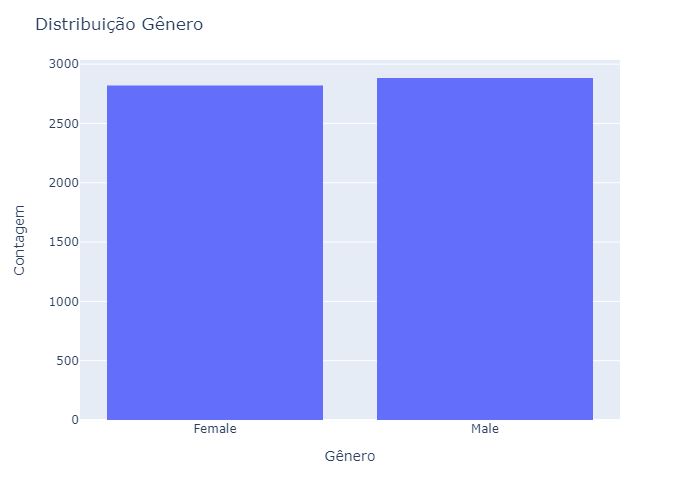

<IPython.core.display.Javascript object>

In [12]:
fig_gander= px.histogram(voters, x='gender')
fig_gander.update_layout(title='Distribuição Gênero', xaxis_title='Gênero', yaxis_title='Contagem')
fig_gander.show('png')

No que diz respeito ao gênero, a amostra está equilibrada, com uma pequena vantagem para o gênero masculino.

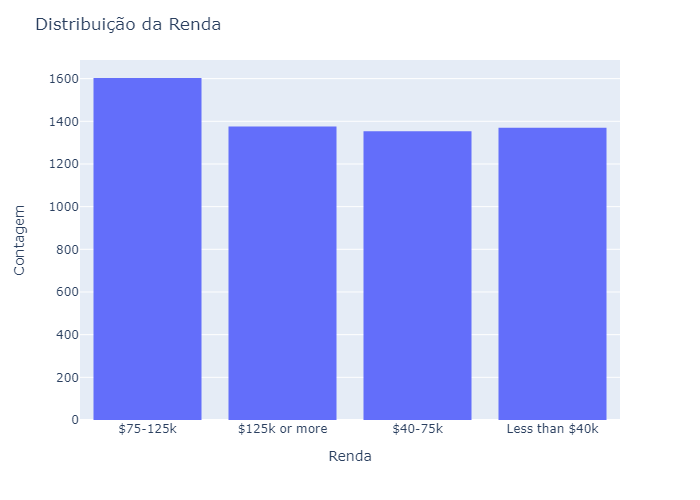

<IPython.core.display.Javascript object>

In [13]:
fig_cat= px.histogram(voters, x='income_cat')
fig_cat.update_layout(title='Distribuição da Renda', xaxis_title='Renda', yaxis_title='Contagem')
fig_cat.show('png')

No aspecto da distribuição de renda, a maioria dos eleitores encontra-se na faixa de 75 a 125 mil dólares.

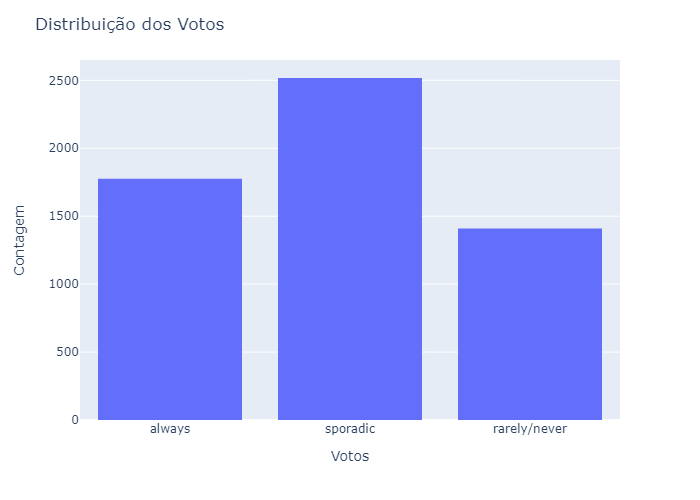

<IPython.core.display.Javascript object>

In [14]:
fig_vote= px.histogram(voters, x='voter_category')
fig_vote.update_layout(title='Distribuição dos Votos', xaxis_title='Votos', yaxis_title='Contagem')
fig_vote.show('png')

Os dados revelam que, de uma forma geral, os eleitores não são muito assíduos nas eleições; a maioria vota de forma esporádica, conforme nossa análise.

In [15]:
count_income_by_race = voters.groupby(['race', 'income_cat']).size().reset_index(name='count')
print(count_income_by_race)


           race      income_cat  count
0         Black   $125k or more    124
1         Black         $40-75k    236
2         Black        $75-125k    219
3         Black  Less than $40k    320
4      Hispanic   $125k or more    155
5      Hispanic         $40-75k    195
6      Hispanic        $75-125k    226
7      Hispanic  Less than $40k    210
8   Other/Mixed   $125k or more    125
9   Other/Mixed         $40-75k     72
10  Other/Mixed        $75-125k     99
11  Other/Mixed  Less than $40k     76
12        White   $125k or more    972
13        White         $40-75k    850
14        White        $75-125k   1059
15        White  Less than $40k    764


<IPython.core.display.Javascript object>

In [16]:
faixas_etarias = [17, 30, 50, float('inf')]
rotulos = ['18-30', '31-50', '51+']
voters['faixa_etaria'] = pd.cut(voters['ppage'], bins=faixas_etarias, labels=rotulos, right=False)
voters.head()


,Q2_1,Q2_4,Q2_7,Q2_8,Q30,ppage,educ,race,gender,income_cat,voter_category,faixa_etaria
0,1,4,2,2,2,73,College,White,Female,$75-125k,always,51+
1,1,3,2,1,3,90,College,White,Female,$125k or more,always,51+
2,1,2,2,1,2,53,College,White,Male,$125k or more,sporadic,51+
3,1,3,1,1,2,58,Some college,Black,Female,$40-75k,sporadic,51+
4,1,1,1,1,1,81,High school or less,White,Male,$40-75k,always,51+


<IPython.core.display.Javascript object>

Aqui criamosuma categorização das idades dos eleitores em faixas etárias específica

In [17]:
tabela_contagem = pd.crosstab(voters['faixa_etaria'], voters['Q2_8'])
print(tabela_contagem)

Q2_8             1     2    3   4
faixa_etaria                     
18-30          457   347   71  16
31-50          916   536   92  28
51+           2065  1018  125  31


<IPython.core.display.Javascript object>

In [18]:
def converter_para_valor(faixa):
    if 'or more' in faixa:
        return float(faixa.split()[0].replace('$', '').replace('k', '')) * 1000
    elif 'Less than' in faixa:
        return float(faixa.split()[-1].replace('$', '').replace('k', ''))
    else:
        valores = faixa.split('-')
        valor_inicial = float(valores[0].replace('$', '').replace('k', '')) * 1000
        valor_final = float(valores[1].replace('$', '').replace('k', '')) * 1000
        return (valor_inicial + valor_final) / 2

voters['valor_salario'] = voters['income_cat'].apply(converter_para_valor)
print(voters[['income_cat', 'valor_salario']])


          income_cat  valor_salario
0           $75-125k       100000.0
1      $125k or more       125000.0
2      $125k or more       125000.0
3            $40-75k        57500.0
4            $40-75k        57500.0
...              ...            ...
5831         $40-75k        57500.0
5832   $125k or more       125000.0
5833   $125k or more       125000.0
5834  Less than $40k           40.0
5835  Less than $40k           40.0

[5702 rows x 2 columns]


<IPython.core.display.Javascript object>

Aqui desenvolvemos uma função para converter as faixas salariais em valores numéricos, permitindo-nos realizar análises mais detalhadas.

In [19]:
poder_a = voters.groupby('race')['valor_salario'].mean()
poder_a.head()

race
Black          56710.567297
Hispanic       67679.262087
Other/Mixed    79752.795699
White          75803.994513
Name: valor_salario, dtype: float64

<IPython.core.display.Javascript object>

Aqui agrupamos os eleitores por raça e calculamos o salário médio para cada grupo racial. O resultado nos fornece uma visão geral do poder aquisitivo médio de cada raça na amostra de eleitores.

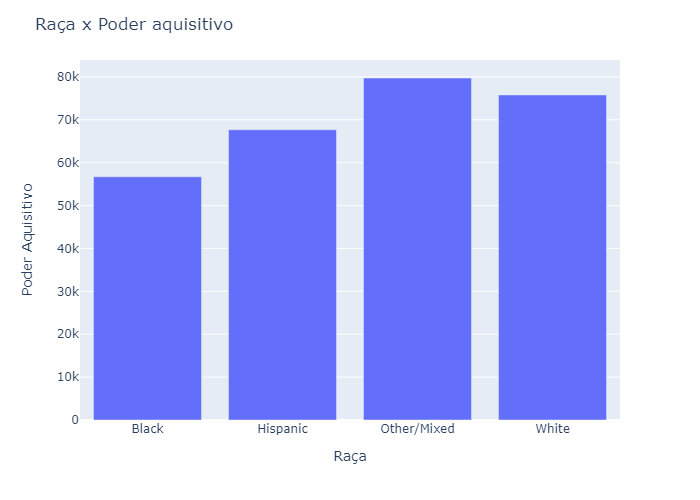

<IPython.core.display.Javascript object>

In [20]:
fig_poder = px.bar(poder_a, x=poder_a.index, y='valor_salario')
fig_poder.update_layout(title='Raça x Poder aquisitivo', xaxis_title='Raça', yaxis_title='Poder Aquisitivo')
fig_poder.show('png')

Para surpresa de muitos, constatamos que a raça com o maior poder aquisitivo é a outra/mista, enquanto a raça com o menor poder aquisitivo é a negra. Essa disparidade econômica revela uma complexa interseção de fatores históricos, sociais e institucionais que moldaram as oportunidades e o acesso a recursos ao longo do tempo. Essa realidade desafia as noções convencionais sobre igualdade de oportunidades e evidencia a necessidade contínua de abordar as desigualdades raciais de maneira significativa e proativa.

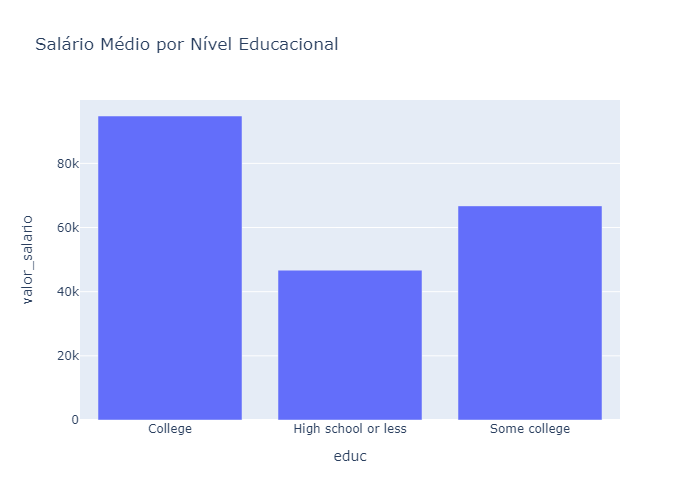

<IPython.core.display.Javascript object>

In [21]:
salario_por_educ = voters.groupby('educ')['valor_salario'].mean().reset_index()
fig = px.bar(salario_por_educ, x='educ', y='valor_salario', title='Salário Médio por Nível Educacional')
fig.show('png')


Os dados mostram o valor da educação superior em termos de salário. Pessoas com diploma universitário tendem a ganhar significativamente mais do que aquelas com apenas ensino médio completo. Além disso, os resultados sugerem que o poder aquisitivo está correlacionado positivamente com o nível educacional, indicando que um aumento no nível de educação está associado a um aumento correspondente no salário médio.
Para aprofundar nossa compreensão sobre a relação entre nível educacional e salário, adotaremos uma abordagem estatística rigorosa. Essa análise permitirá tirar conclusões mais robustas e precisas sobre o impacto da educação superior nos rendimentos dos indivíduos.

In [22]:
education_mapping = {'High school or less': 1, 'Some college': 2, 'College': 3} 
voters['educ_numeric'] = voters['educ'].map(education_mapping)
coeficiente_correlacao = voters['valor_salario'].corr(voters['educ_numeric'])

print("Coeficiente de correlação de Pearson:", coeficiente_correlacao)


Coeficiente de correlação de Pearson: 0.4315365808492786


<IPython.core.display.Javascript object>

Com um coeficiente de correlação de Pearson de aproximadamente 0.43, podemos interpretar que há uma correlação positiva moderada entre o salário e o nível educacional. Isso sugere que, em média, pessoas com um nível educacional mais alto tendem a ter salários mais altos, e vice-versa. No entanto, a correlação não é forte o suficiente para afirmar uma relação linear forte entre essas variáveis.

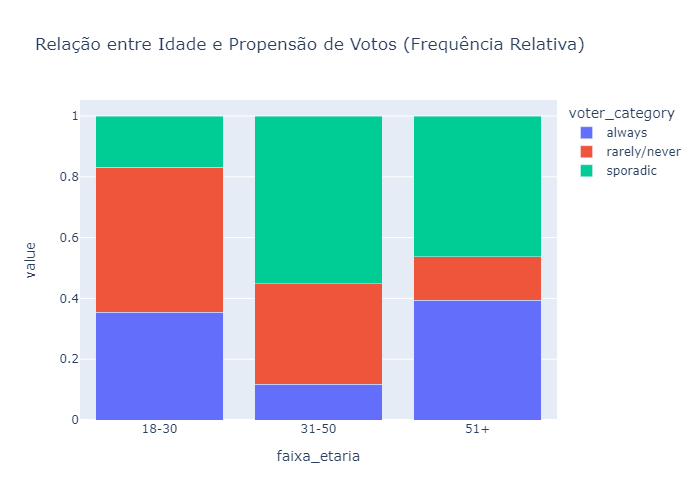

<IPython.core.display.Javascript object>

In [23]:
contingency_table = pd.crosstab(voters['faixa_etaria'], voters['voter_category'])
contingency_table_relative = contingency_table.div(contingency_table.sum(axis=1), axis=0)

fig = px.bar(contingency_table_relative, x=contingency_table_relative.index, y=contingency_table_relative.columns,
             title='Relação entre Idade e Propensão de Votos (Frequência Relativa)',
             labels={'x': 'Idade', 'y': 'Frequência Relativa'},
             barmode='stack')
fig.show('png')


Na faixa etária de 18 a 30 anos, cerca de 48% dos eleitores optam por não participar das eleições, votando raramente ou nunca. Por outro lado, na faixa etária de 31 a 50 anos, a participação dos eleitores é notavelmente menor, com aproximadamente 12% comparecendo sempre às urnas, representando a menor taxa de participação entre as faixas etárias analisadas. Em contraste, os eleitores mais velhos, com 51 anos ou mais, demonstram uma maior assiduidade nas urnas.

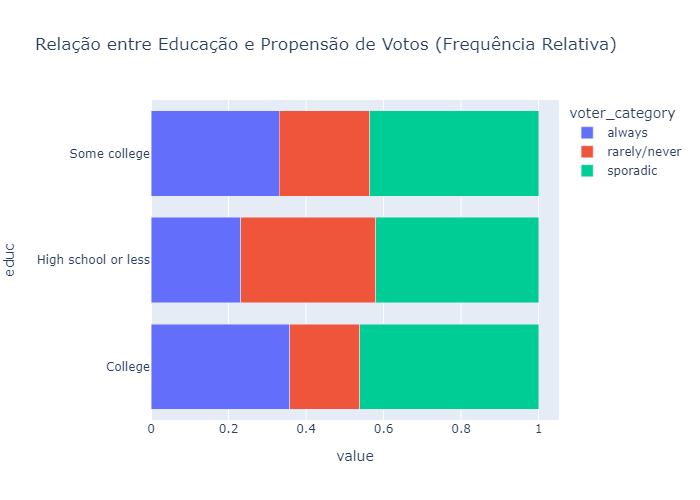

<IPython.core.display.Javascript object>

In [24]:
contingency_table = pd.crosstab(voters['educ'], voters['voter_category'])
contingency_table_relative = contingency_table.div(contingency_table.sum(axis=1), axis=0)
fig = px.bar(contingency_table_relative, y=contingency_table_relative.index, x=contingency_table_relative.columns,
             title='Relação entre Educação e Propensão de Votos (Frequência Relativa)',
             labels={'x': 'Propensão de Votos', 'y': 'Educação'},
             barmode='stack')
fig.show('png')


Os eleitores com um nível educacional mais elevado tendem a assumir uma maior responsabilidade em relação ao ato de votar. Aproximadamente 82% dos eleitores graduados votam regularmente ou esporadicamente, representando uma proporção significativa entre as categorias "always" e "sporadic".

In [25]:
items = ['Q2_1', 'Q2_4', 'Q2_7']
non_white_voters = voters[voters['race'] != 'White']
frequencies = []
for item in items:
    frequency = non_white_voters[item].value_counts(normalize=True) * 100
    frequencies.append(frequency)
frequencies_df = pd.DataFrame(frequencies, index=items)
frequencies_df = frequencies_df.transpose()
print(frequencies_df)


        Q2_1       Q2_4       Q2_7
1  80.943121  25.085075  58.045698
2  13.271755  28.390860  28.682547
4   3.305785  18.181818   3.889159
3   2.479339  28.342246   9.382596


<IPython.core.display.Javascript object>

 Aqui foi realizada uma análise das respostas dos eleitores não-brancos para três itens específicos da pesquisa. Este processo permite uma análise clara e estruturada das respostas dos eleitores não-brancos para os itens selecionados da pesquisa.

In [26]:
non_white_voters = voters[voters['race'] != 'White']
high_income = non_white_voters[non_white_voters['valor_salario'] >= 75000]
low_income = non_white_voters[non_white_voters['valor_salario'] < 40000]
high_income_distribution = high_income[items].apply(lambda x: x.value_counts(normalize=True) * 100)
low_income_distribution = low_income[items].apply(lambda x: x.value_counts(normalize=True) * 100)

print("Distribuição das respostas para não-brancos de maior poder aquisitivo:")
print(high_income_distribution)
print("\nDistribuição das respostas para não-brancos de menor poder aquisitivo:")
print(low_income_distribution)


Distribuição das respostas para não-brancos de maior poder aquisitivo:
        Q2_1       Q2_4       Q2_7
1  85.759494  20.780591  56.856540
2  10.548523  26.476793  29.852321
3   1.582278  32.700422   9.493671
4   2.109705  20.042194   3.797468

Distribuição das respostas para não-brancos de menor poder aquisitivo:
        Q2_1       Q2_4       Q2_7
1  75.247525  30.528053  59.900990
2  16.336634  32.178218  26.237624
3   3.300330  22.112211   9.405941
4   5.115512  15.181518   4.455446


<IPython.core.display.Javascript object>

O código fornecido realiza uma análise comparativa das respostas dos eleitores não-brancos divididos por faixa de poder aquisitivo.

Os passos acima resultam em uma visão clara e estruturada das diferenças nas respostas dos eleitores não-brancos com base no poder aquisitivo, permitindo uma comparação fácil entre os dois grupos analisados.

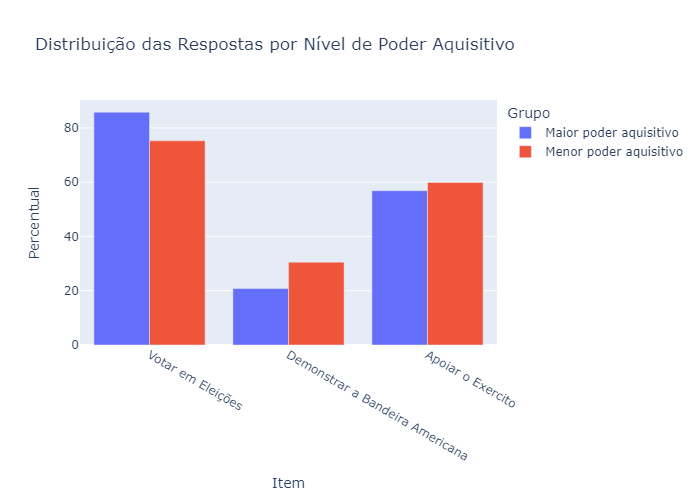

<IPython.core.display.Javascript object>

In [27]:
data = {
    'Item': ['Votar em Eleições', 'Demonstrar a Bandeira Americana', 'Apoiar o Exercito'],
    'Maior poder aquisitivo': [85.759494, 20.780591, 56.856540],
    'Menor poder aquisitivo': [75.247525, 30.528053, 59.900990]
}
df = pd.DataFrame(data)
df_long = df.melt(id_vars='Item', 
                  value_vars=['Maior poder aquisitivo', 'Menor poder aquisitivo'], 
                  var_name='Grupo', 
                  value_name='Percentual')
fig = px.bar(df_long, 
             x='Item', 
             y='Percentual', 
             color='Grupo', 
             barmode='group',
             title='Distribuição das Respostas por Nível de Poder Aquisitivo')
fig.show('png')

Votar em eleições é considerado a característica mais importante para ser um bom americano entre os não-brancos, tanto para os de maior quanto para os de menor poder aquisitivo. Porém, a importância atribuída a votar é maior entre os de maior poder aquisitivo (85,8%) comparado aos de menor poder aquisitivo (75,2%).

Demonstrar a bandeira americana é considerado menos importante pelos não-brancos de maior poder aquisitivo (20,8%) do que pelos de menor poder aquisitivo (30,5%).

Apoiar o exército tem uma importância similar entre os dois grupos, com uma leve diferença: 56,9% dos não-brancos de maior poder aquisitivo acham muito importante, comparado a 59,9% dos de menor poder aquisitivo.

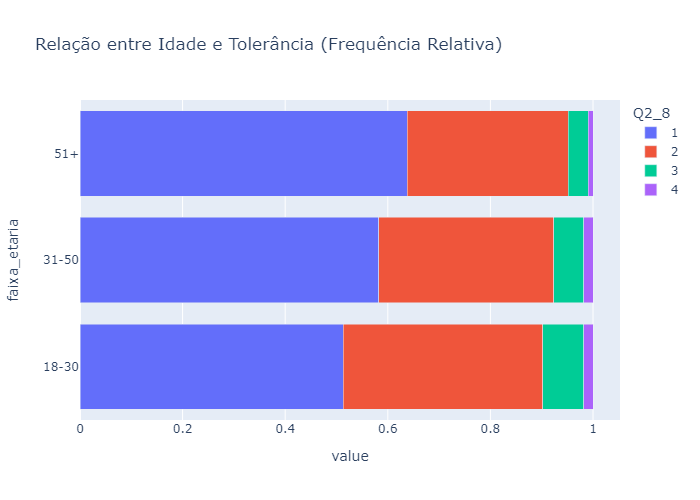

<IPython.core.display.Javascript object>

In [28]:
contingency_table = pd.crosstab(voters['faixa_etaria'], voters['Q2_8'])
contingency_table_relative = contingency_table.div(contingency_table.sum(axis=1), axis=0)
fig = px.bar(contingency_table_relative, y=contingency_table_relative.index, x=contingency_table_relative.columns,
             title='Relação entre Idade e Tolerância (Frequência Relativa)',
             labels={'x': 'Tolerância', 'y': 'Idade'},
             barmode='stack')
fig.show('png')


Considerando que respeitar a opinião dos outros (Q2_8) é um indício de tolerância, ao compararmos as diferentes gerações, podemos observar que a faixa etária mais tolerante é a de 51 anos ou mais, enquanto a menos tolerante é a dos jovens de 18 a 30 anos. Vale ressaltar que a opção 1 representa "Very important".

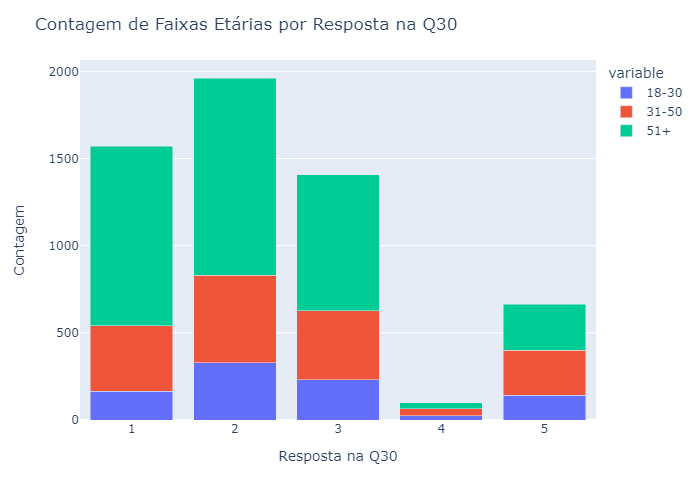

<IPython.core.display.Javascript object>

In [29]:
count_by_q30 = voters.groupby('Q30')['faixa_etaria'].value_counts().unstack()
fig = px.bar(count_by_q30, barmode='stack')
fig.update_layout(title='Contagem de Faixas Etárias por Resposta na Q30', xaxis_title='Resposta na Q30', yaxis_title='Contagem')
fig.show('png')


A análise da distribuição etária entre eleitores revela que os Democratas (opção 2) possuem o maior número de eleitores jovens, com 328 pessoas na faixa etária de 18 a 30 anos. Este dado indica que os Democratas têm uma forte atração entre a população jovem.

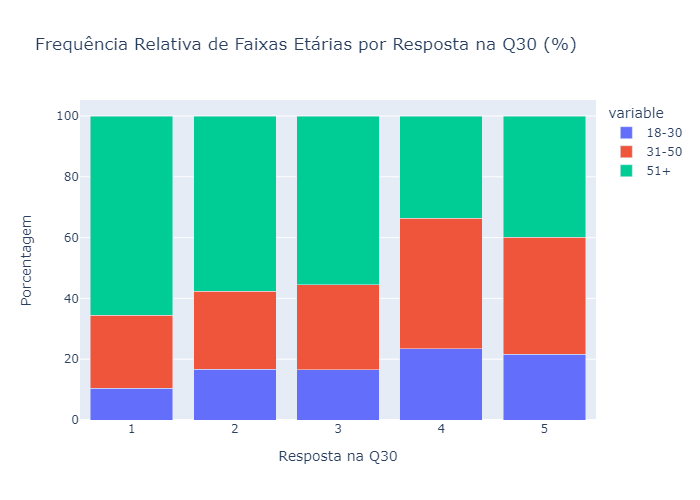

<IPython.core.display.Javascript object>

In [30]:
count_by_q30 = voters.groupby('Q30')['faixa_etaria'].value_counts().unstack().fillna(0)
relative_frequency = count_by_q30.div(count_by_q30.sum(axis=1), axis=0) * 100  # Multiplicar por 100 para obter a porcentagem
fig = px.bar(relative_frequency, 
             barmode='stack',
             title='Frequência Relativa de Faixas Etárias por Resposta na Q30 (%)',
             labels={'Q30': 'Resposta na Q30', 'value': 'Porcentagem', 'faixa_etaria': 'Faixa Etária'})
fig.update_layout(xaxis_title='Resposta na Q30', yaxis_title='Porcentagem')
fig.show('png')

Ao analisar o perfil demográfico dos eleitores Democratas (2), identificamos que a maioria (57.6%) tem 51 anos ou mais, 25.6% estão na faixa etária de 31 a 50 anos e 16.8% têm entre 18 e 30 anos.

Ao analisar o perfil demográfico dos eleitores republicanos (1), identificamos que a maioria (65%) tem 51 anos ou mais. Esse dado revela uma oportunidade estratégica para a equipe de marketing do partido republicano: direcionar seus esforços para atrair e mobilizar esse segmento da população. Concentrando-se em mensagens, canais de comunicação e questões relevantes para os eleitores mais velhos, o partido pode fortalecer sua base eleitoral e aumentar suas chances de sucesso nas eleições. Essa abordagem permite aproveitar a experiência, sabedoria e preocupações específicas desse grupo demográfico, construindo uma conexão sólida e duradoura com os eleitores republicanos mais maduros.

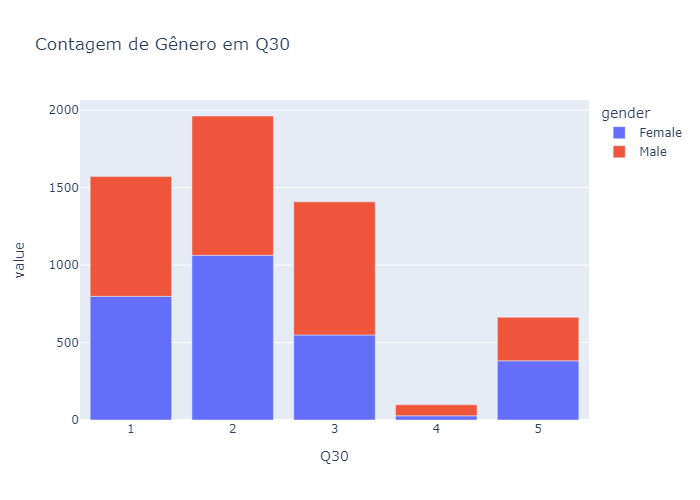

<IPython.core.display.Javascript object>

In [31]:
count_by_q30 = voters.groupby('Q30')['gender'].value_counts().unstack()
fig = px.bar(count_by_q30, 
             title='Contagem de Gênero em Q30',
             labels={'x': 'Valor Único da Q30', 'y': 'Contagem'})
fig.show('png')


A maioria do público feminino apoia os Democratas (opção 2).

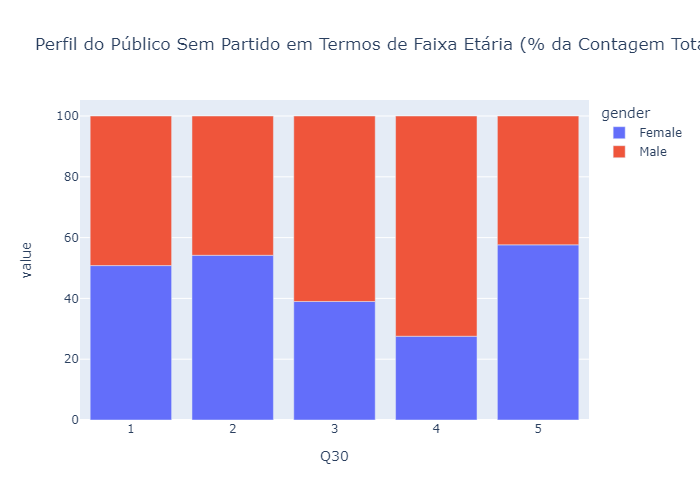

<IPython.core.display.Javascript object>

In [32]:
relative_frequency = count_by_q30.div(count_by_q30.sum(axis=1), axis=0) * 100  # Multiplicar por 100 para obter a porcentagem
fig = px.bar(relative_frequency, 
             x=relative_frequency.index,
             y=relative_frequency.columns,
             title='Perfil do Público Sem Partido em Termos de Faixa Etária (% da Contagem Total)',
             labels={'x': 'Valor Único da Q30', 'y': 'Porcentagem', 'faixa_etaria': 'Faixa Etária'})
fig.show('png')


Ao analisar a distribuição de gênero entre os eleitores, observamos as seguintes diferenças entre republicanos e democratas:

Para os republicanos, 49.2% dos eleitores são homens, enquanto 50.8% são mulheres. Isso indica uma leve maioria feminina entre os eleitores republicanos.

Por outro lado, entre os democratas, a proporção de mulheres é maior, com 54.2% dos eleitores sendo do gênero feminino e 45.8% do gênero masculino. Esta distribuição mostra uma presença significativamente maior de mulheres entre os eleitores democratas em comparação com os republicanos.



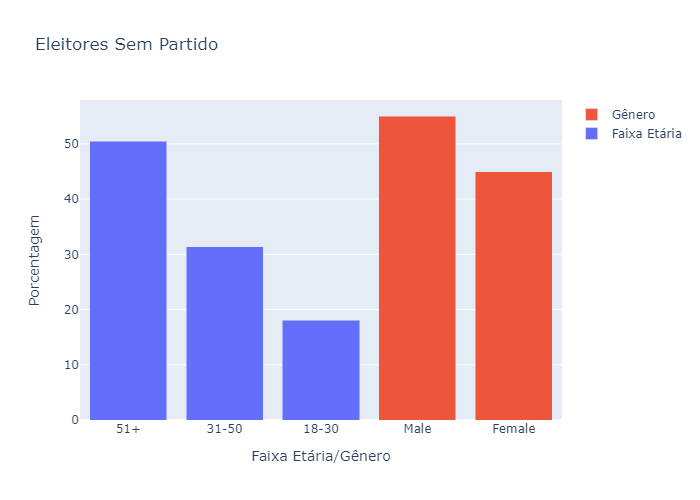

<IPython.core.display.Javascript object>

In [33]:
filtered_data = voters[voters['Q30'].isin([3, 5])]

count_by_age = filtered_data['faixa_etaria'].value_counts()
count_by_gender = filtered_data['gender'].value_counts()

relative_frequency_age = count_by_age / count_by_age.sum() * 100
relative_frequency_gender = count_by_gender / count_by_gender.sum() * 100

fig = go.Figure()
fig.add_trace(go.Bar(
    x=relative_frequency_age.index,
    y=relative_frequency_age.values,
    name='Faixa Etária'
))

fig.add_trace(go.Bar(
    x=relative_frequency_gender.index,
    y=relative_frequency_gender.values,
    name='Gênero'
))

fig.update_layout(
    title='Eleitores Sem Partido',
    xaxis_title='Faixa Etária/Gênero',
    yaxis_title='Porcentagem',
    barmode='stack'
)

fig.show('png')


Para os eleitores sem partido, a distribuição etária é a seguinte: 50.5% têm 51 anos ou mais, 31.4% estão na faixa etária de 31 a 50 anos, e 18.1% têm entre 18 e 30 anos. No que diz respeito ao gênero, a maioria dos eleitores sem partido são homens, representando 55% do total, enquanto 45% são mulheres.



### Insights e Conclusão

##### Perfil da Amostra:

A amostra analisada inclui uma variedade de idades, gêneros, raças, níveis educacionais e faixas de renda.
A maioria dos eleitores encontra-se na faixa de renda entre 75 mil e 125 mil dólares, com uma mediana de salário de 100 mil dólares.
A faixa etária dos eleitores varia de 22 a 94 anos, com a maioria situada entre 36 e 65 anos.

##### Relação entre Educação e Renda:

Há uma correlação positiva entre nível educacional e renda. Os eleitores com maior nível educacional tendem a ter salários mais altos.
Análises estatísticas confirmaram que esta correlação é significativa.

##### Importância de Valores para Ser um Bom Americano:

Dentre os não-brancos, votar em eleições é considerado o valor mais importante, seguido por apoiar o exército e demonstrar a bandeira americana.
Eleitores não-brancos de maior poder aquisitivo (75 mil dólares ou mais) consideram votar em eleições mais importante (85,8%) em comparação com eleitores de menor poder aquisitivo (menos de 40 mil dólares), que valorizam menos (75,2%).
Por outro lado, demonstrar a bandeira americana é mais importante para eleitores de menor poder aquisitivo (30,5%) do que para os de maior poder aquisitivo (20,8%).

##### Tolerância Entre Gerações:

Respeitar a opinião dos outros é visto como um indicador de tolerância. A análise revelou que os eleitores com 51 anos ou mais são os mais tolerantes, enquanto os jovens de 18 a 30 anos são os menos tolerantes.

##### Escolhas Partidárias:

Em relação às escolhas partidárias, eleitores mais jovens tendem a ser independentes ou a não ter preferência partidária, enquanto as mulheres têm maior representação entre os eleitores democratas.
A propensão ao voto aumenta com a idade, indicando uma maior participação política entre eleitores mais velhos.

##### Conclusão:

A análise dos dados da amostra de eleitores revela uma relação significativa entre educação e renda, com maior nível educacional associado a salários mais altos. A participação política, expressa pela importância de votar, é mais valorizada pelos eleitores de maior poder aquisitivo. Em termos de tolerância, a geração mais velha demonstra ser mais aberta a respeitar opiniões divergentes. Estes insights fornecem uma visão abrangente do perfil e das atitudes dos eleitores, destacando a influência da educação, renda e idade nas suas percepções e comportamentos políticos.